<a href="https://colab.research.google.com/github/chettkulkarni/Reinforcement_Learning/blob/main/MountainCar_Sarsa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mountain Car Gym 
RL learning using SARSA algorithm

As google collab doesnt have display attached, creating a virtual display and will be using images refreshed frequently to showcase learning

## Importing Libraries

In [1]:
!apt-get install python-opengl -y

!apt install xvfb -y

!pip install pyvirtualdisplay

!pip install piglet


from pyvirtualdisplay import Display
Display().start()

import gym
from IPython import display
import matplotlib.pyplot as plt
%matplotlib inline


Reading package lists... Done
Building dependency tree       
Reading state information... Done
Suggested packages:
  libgle3
The following NEW packages will be installed:
  python-opengl
0 upgraded, 1 newly installed, 0 to remove and 6 not upgraded.
Need to get 496 kB of archives.
After this operation, 5,416 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 python-opengl all 3.1.0+dfsg-1 [496 kB]
Fetched 496 kB in 1s (668 kB/s)
Selecting previously unselected package python-opengl.
(Reading database ... 144617 files and directories currently installed.)
Preparing to unpack .../python-opengl_3.1.0+dfsg-1_all.deb ...
Unpacking python-opengl (3.1.0+dfsg-1) ...
Setting up python-opengl (3.1.0+dfsg-1) ...
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  xvfb
0 upgraded, 1 newly installed, 0 to remove and 6 not upgraded.
Need to get 783 kB of ar

## Setting up the Gym Env of MountainCar-v0

In [2]:
import gym
import numpy as np

env_name = "MountainCar-v0"
env = gym.make(env_name)
env.reset()
 # only call this once

array([-0.51287898,  0.        ])

## Parameter insitilisations

In [3]:
n_states = 40  # number of states
episodes = 10 # number of episodes

initial_lr = 1.0 # initial learning rate
min_lr = 0.005 # minimum learning rate
gamma = 0.99 # discount factor
max_steps = 300
epsilon = 0.05

env = env.unwrapped
env.seed(0)         #setting environment seed to reproduce same result
np.random.seed(0)   #setting numpy random number generation seed to reproduce same random numbers

In [4]:
def discretization(env, obs):
    
    env_low = env.observation_space.low
    env_high = env.observation_space.high
    
    env_den = (env_high - env_low) / n_states
    pos_den = env_den[0]
    vel_den = env_den[1]
    
    pos_high = env_high[0]
    pos_low = env_low[0]
    vel_high = env_high[1]
    vel_low = env_low[1]
    
    pos_scaled = int((obs[0] - pos_low)/pos_den)  #converts to an integer value
    vel_scaled = int((obs[1] - vel_low)/vel_den)  #converts to an integer value
    
    return pos_scaled,vel_scaled

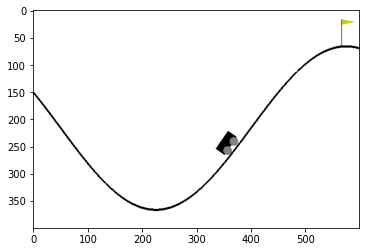

In [ ]:
#Q table
#rows are states but here state is 2-D pos,vel
#columns are actions
#therefore, Q- table would be 3-D
img = plt.imshow(env.render('rgb_array'))
q_table = np.zeros((n_states,n_states,env.action_space.n))
total_steps = 0
for episode in range(episodes):
   obs = env.reset()
   total_reward = 0
   # decreasing learning rate alpha over time
   alpha = max(min_lr,initial_lr*(gamma**(episode//100)))
   steps = 0

   #action for the initial state using epsilon greedy
   if np.random.uniform(low=0,high=1) < epsilon:
        a = np.random.choice(env.action_space.n)
   else:
        pos,vel = discretization(env,obs)
        a = np.argmax(q_table[pos][vel])
  
   while True:
      for _ in range(2):
        img.set_data(env.render('rgb_array')) # just update the data
        display.display(plt.gcf())
        display.clear_output(wait=True)
        action = env.action_space.sample()
        env.step(action)

      pos,vel = discretization(env,obs)

      obs,reward,terminate,_ = env.step(a) 
      total_reward += abs(obs[0]+0.5) 
      pos_,vel_ = discretization(env,obs)

      #action for the next state using epsilon greedy
      if np.random.uniform(low=0,high=1) < epsilon:
          a_ = np.random.choice(env.action_space.n)
      else:
          a_ = np.argmax(q_table[pos_][vel_])

      #q-table update
      q_table[pos][vel][a] = (1-alpha)*q_table[pos][vel][a] + alpha*(reward+gamma*q_table[pos_][vel_][a_])
      steps+=1
      if terminate:
          break
      a = a_
   print("Episode {} completed with total reward {} in {} steps".format(episode+1,total_reward,steps)) 
while True: #to hold the render at the last step when Car passes the flag
   img.set_data(env.render('rgb_array'))
   display.display(plt.gcf())
   display.clear_output(wait=True)
   action = env.action_space.sample()
   env.step(action)

## Learning Steps

After a while the car will reach the flag


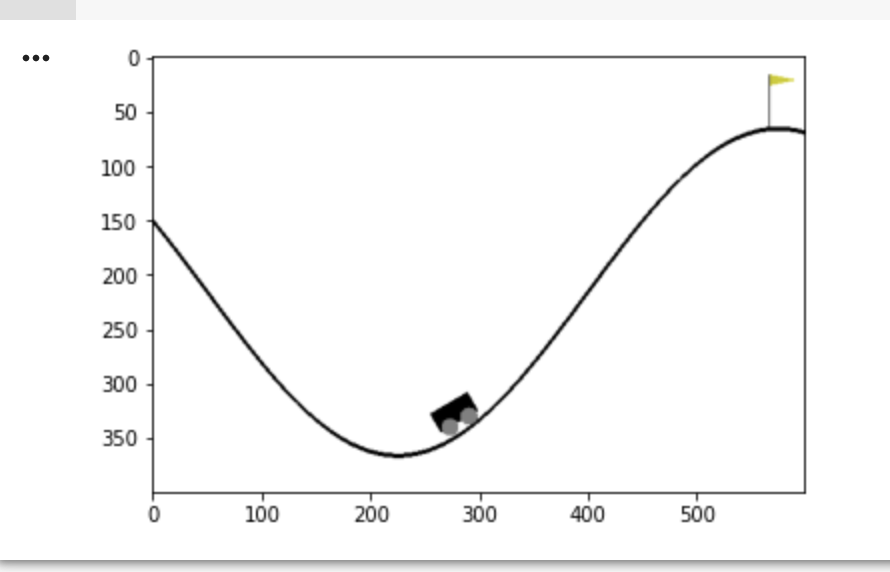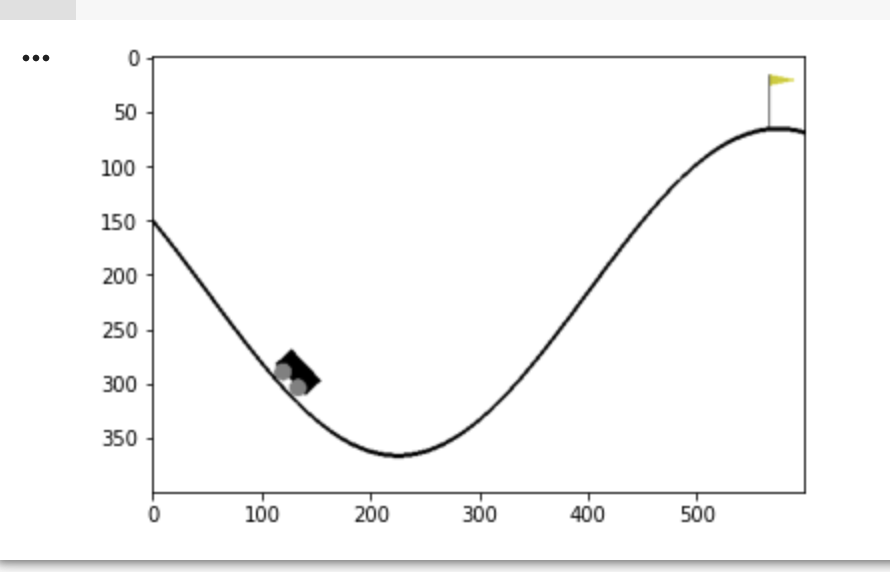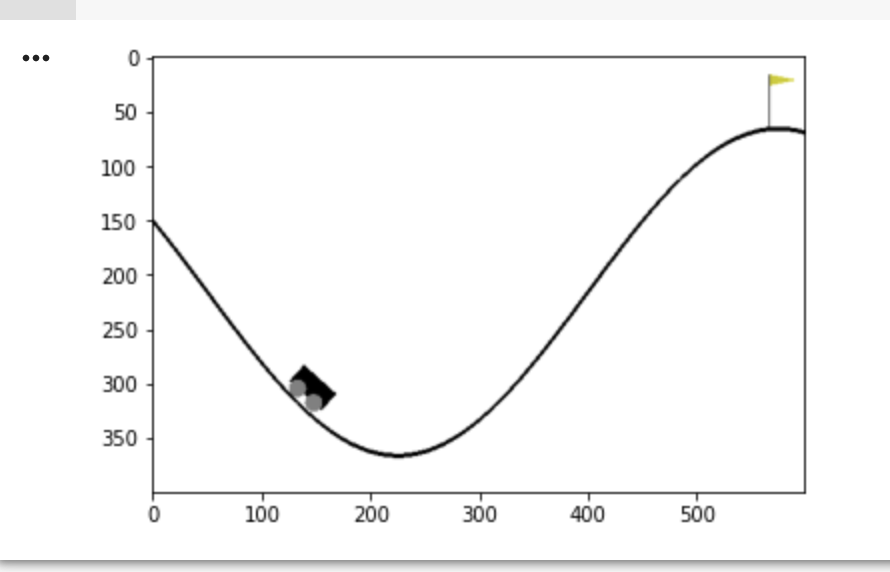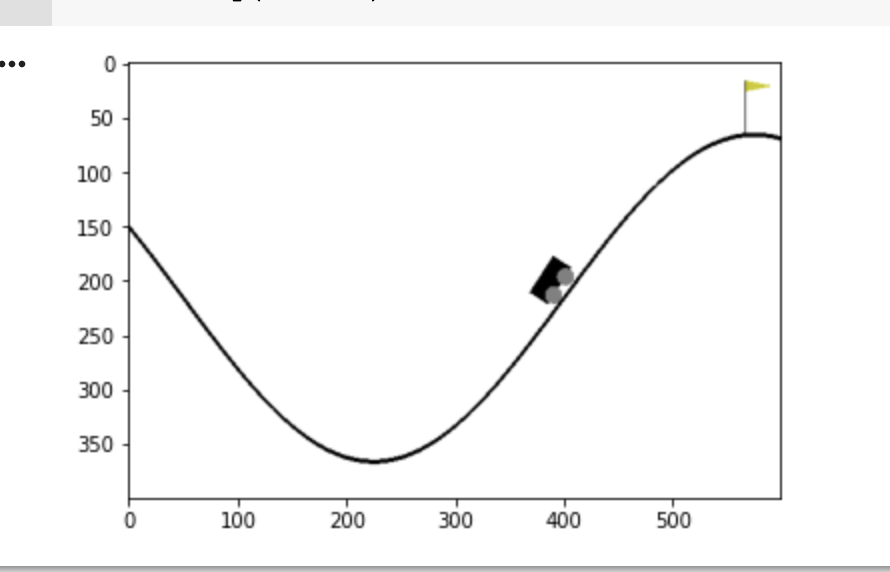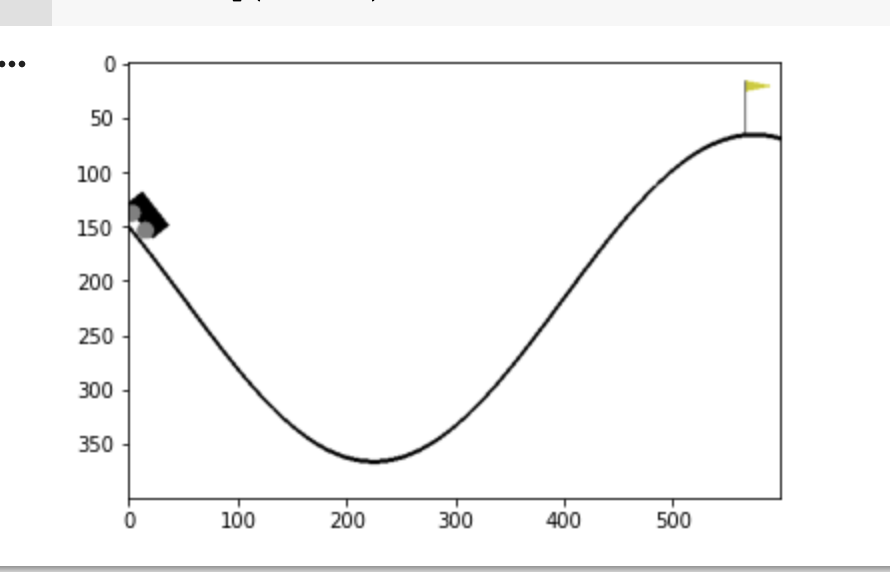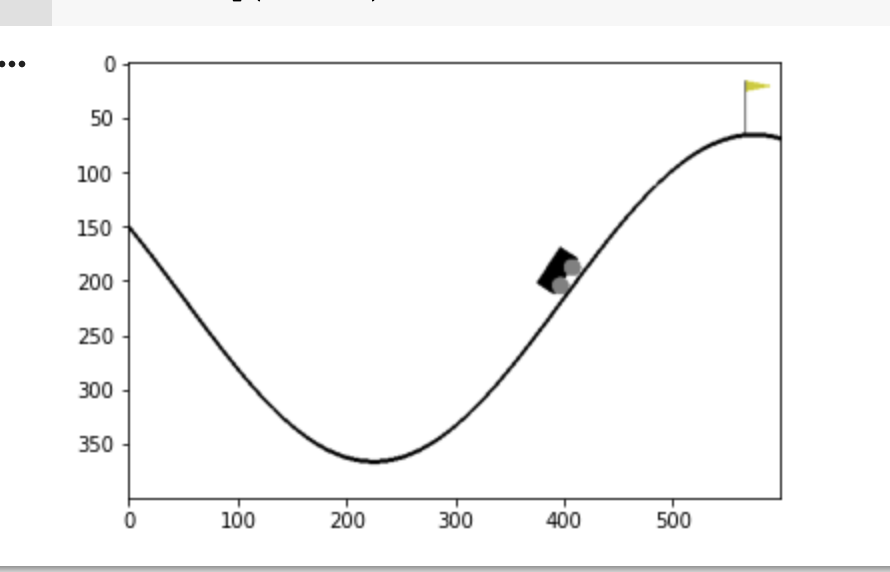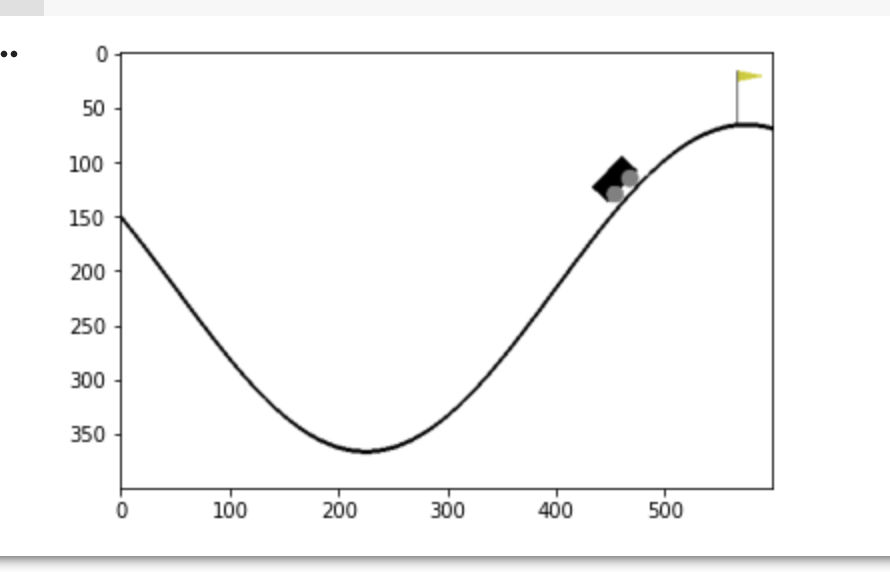